In [1]:
!pip install wordcloud

In [2]:
!pip3 install textblob

In [3]:
 pip install plotly 

Note: you may need to restart the kernel to use updated packages.


In [4]:
#Basic libraries
import pandas as pd 
import numpy as np

#NLTK libraries
import nltk
import re
import string
from wordcloud import WordCloud,STOPWORDS
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

# Machine Learning libraries
import sklearn 
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn import svm, datasets
from sklearn import preprocessing 


#Metrics libraries
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

#Visualization libraries
import matplotlib.pyplot as plt 
from matplotlib import rcParams
import seaborn as sns
from textblob import TextBlob
from plotly import tools
import plotly.graph_objs as go
from plotly.offline import iplot
%matplotlib inline

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv(r"Musical_instruments_reviews.csv")
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"


In [6]:
df.tail()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
10256,A14B2YH83ZXMPP,B00JBIVXGC,Lonnie M. Adams,"[0, 0]","Great, just as expected. Thank to all.",5.0,Five Stars,1405814400,"07 20, 2014"
10257,A1RPTVW5VEOSI,B00JBIVXGC,Michael J. Edelman,"[0, 0]",I've been thinking about trying the Nanoweb st...,5.0,"Long life, and for some players, a good econom...",1404259200,"07 2, 2014"
10258,AWCJ12KBO5VII,B00JBIVXGC,Michael L. Knapp,"[0, 0]",I have tried coated strings in the past ( incl...,4.0,Good for coated.,1405987200,"07 22, 2014"
10259,A2Z7S8B5U4PAKJ,B00JBIVXGC,"Rick Langdon ""Scriptor""","[0, 0]","Well, MADE by Elixir and DEVELOPED with Taylor...",4.0,Taylor Made,1404172800,"07 1, 2014"
10260,A2WA8TDCTGUADI,B00JBIVXGC,TheTerrorBeyond,"[0, 0]","These strings are really quite good, but I wou...",4.0,"These strings are really quite good, but I wou...",1405468800,"07 16, 2014"


In [7]:
df.describe()

,overall,unixReviewTime
count,10261.000000,1.026100e+04
mean,4.488744,1.360606e+09
std,0.894642,3.779735e+07
min,1.000000,1.095466e+09
25%,4.000000,1.343434e+09
50%,5.000000,1.368490e+09
75%,5.000000,1.388966e+09
max,5.000000,1.405987e+09


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10261 entries, 0 to 10260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewerID      10261 non-null  object 
 1   asin            10261 non-null  object 
 2   reviewerName    10234 non-null  object 
 3   helpful         10261 non-null  object 
 4   reviewText      10254 non-null  object 
 5   overall         10261 non-null  float64
 6   summary         10261 non-null  object 
 7   unixReviewTime  10261 non-null  int64  
 8   reviewTime      10261 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 721.6+ KB


In [9]:
df.shape

(10261, 9)

In [10]:
df=df.drop(['reviewerID','asin','reviewerName','unixReviewTime','helpful'], axis=1)
df.head()

,reviewText,overall,summary,reviewTime
0,"Not much to write about here, but it does exac...",5.0,good,"02 28, 2014"
1,The product does exactly as it should and is q...,5.0,Jake,"03 16, 2013"
2,The primary job of this device is to block the...,5.0,It Does The Job Well,"08 28, 2013"
3,Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,"02 14, 2014"
4,This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,"02 21, 2014"


In [11]:
df.isna().sum()

reviewText    7
overall       0
summary       0
reviewTime    0
dtype: int64

In [12]:
df['reviewText'].fillna('Null', inplace = True)
df.isna().any()

reviewText    False
overall       False
summary       False
reviewTime    False
dtype: bool

In [13]:
df['overall'].unique()

array([5., 3., 4., 2., 1.])

In [14]:
def rating(overall):
    if (int(overall <= 3)):
        return 0
    else:
        return 1
        
df['rating'] = df['overall'].apply(rating)
df = df.drop(['overall'], axis = 1)
df.head()

,reviewText,summary,reviewTime,rating
0,"Not much to write about here, but it does exac...",good,"02 28, 2014",1
1,The product does exactly as it should and is q...,Jake,"03 16, 2013",1
2,The primary job of this device is to block the...,It Does The Job Well,"08 28, 2013",1
3,Nice windscreen protects my MXL mic and preven...,GOOD WINDSCREEN FOR THE MONEY,"02 14, 2014",1
4,This pop filter is great. It looks and perform...,No more pops when I record my vocals.,"02 21, 2014",1


In [15]:
df.rating.unique()

array([1, 0], dtype=int64)

## Good and Bad reviews viz

<AxesSubplot:xlabel='rating', ylabel='count'>

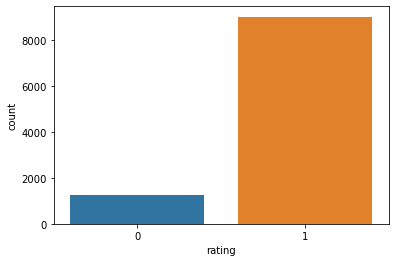

In [16]:
sns.countplot(df.rating)

Most of the reviews are good

In [17]:
df['reviewText'] = df['reviewText'] + df['summary']
df = df.drop(['summary'], axis = 1)
df.head()

,reviewText,reviewTime,rating
0,"Not much to write about here, but it does exac...","02 28, 2014",1
1,The product does exactly as it should and is q...,"03 16, 2013",1
2,The primary job of this device is to block the...,"08 28, 2013",1
3,Nice windscreen protects my MXL mic and preven...,"02 14, 2014",1
4,This pop filter is great. It looks and perform...,"02 21, 2014",1


In [18]:
x = pd.DataFrame(df['reviewText'])
y = pd.DataFrame(df.rating)
df.reviewText = df.reviewText.astype('str')

- removing stop words
- removing punctuations
- tokenization
- lemmatization
- bow
- tf-idf

In [19]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [33]:
import spacy
nlp = spacy.load("en_core_web_sm")
from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk
nltk.download('wordnet')
tokenizer = RegexpTokenizer(r'\w+')
lemmatizer = WordNetLemmatizer()
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

            
def furnished(text):
    final_text = []
    for i in text.split():
        if i.lower() not in stop:
            word = lemmatizer.lemmatize(i)
            final_text.append(word.lower())
    return " ".join(final_text)


            
df.reviewText = df.reviewText.apply(furnished)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


In [34]:
df.reviewText.describe()

count                      10261
unique                     10256
top       good stringsfive stars
freq                           3
Name: reviewText, dtype: object

## Common words viz

In [36]:
from collections import Counter
import collections

<AxesSubplot:>

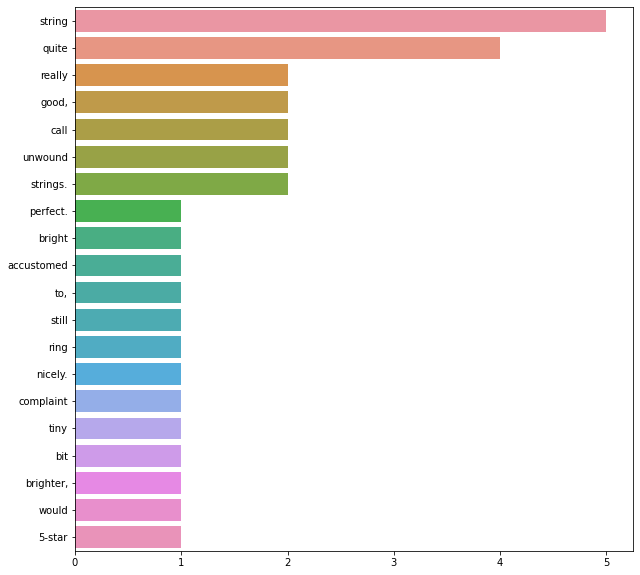

In [37]:
for i in df.reviewText:
    global text
    text = i.split()
    
counter=Counter(text)
most=counter.most_common()

x, y= [], []
for word,count in most[:20]:
    if (word not in stop):
        x.append(word)
        y.append(count)
plt.figure(figsize = (10,10))     
sns.barplot(x=y,y=x)

In [38]:
df.head()

,reviewText,reviewTime,rating
0,"much write here, exactly supposed to. filter p...","02 28, 2014",1
1,product exactly quite affordable.i realized do...,"03 16, 2013",1
2,primary job device block breath would otherwis...,"08 28, 2013",1
3,nice windscreen protects mxl mic prevents pops...,"02 14, 2014",1
4,pop filter great. look performs like studio fi...,"02 21, 2014",1


In [39]:
x_train,x_test,y_train,y_test = train_test_split(df.reviewText,df.rating,test_size = 0.2 , random_state = 0)


In [41]:
#bow
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
bow_x_train = cv.fit_transform(x_train)
bow_x_test = cv.transform(x_test)

print('bow_x_train:',bow_x_train.shape)
print('bow_x_test:',bow_x_test.shape)

bow_x_train: (8208, 590454)
bow_x_test: (2053, 590454)


In [42]:
#tf-idf 
tv=TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))

tfidf_x_train =tv.fit_transform(x_train)
tfidf_x_test =tv.transform(x_test)

print('tfidf_x_train:',tfidf_x_train.shape)
print('tfidf_x_test:',tfidf_x_test.shape)

tfidf_x_train: (8208, 590454)
tfidf_x_test: (2053, 590454)


## Model Fitting, Prediction and accuracy

In [45]:
#Naive Bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
nb = MultinomialNB()

#fit
bow = nb.fit(bow_x_train, y_train)
tfidf = nb.fit(tfidf_x_train, y_train)

#predict
bow_predict = nb.predict(bow_x_test)
tfidf_predict = nb.predict(tfidf_x_test)

#accuracy
nb_bow = accuracy_score(y_test, bow_predict)
nb_tfidf = accuracy_score(y_test,tfidf_predict)

print('nb bow accuracy:', nb_bow)
print('tfidf accuracy:', nb_tfidf)

nb bow accuracy: 0.8894301022893327
tfidf accuracy: 0.8889430102289333


In [46]:
#random forest
rf = RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0)

#fit
bow = rf.fit(bow_x_train, y_train)
tfidf = rf.fit(tfidf_x_train, y_train)

#predict
bow_predict = rf.predict(bow_x_test)
tfidf_predict = rf.predict(tfidf_x_test)

#accuracy
rf_bow = accuracy_score(y_test, bow_predict)
rf_tfidf = accuracy_score(y_test,tfidf_predict)

print('rf bow accuracy:', rf_bow)
print('rf tfidf accuracy:', rf_tfidf)

rf bow accuracy: 0.8889430102289333
rf tfidf accuracy: 0.8889430102289333


In [48]:
#Linear SVC
from sklearn.svm import LinearSVC, SVC
ls =  LinearSVC()

#fit
bow = ls.fit(bow_x_train, y_train)
tfidf = ls.fit(tfidf_x_train, y_train)

#predict
bow_predict = ls.predict(bow_x_test)
tfidf_predict = ls.predict(tfidf_x_test)

#accuracy
ls_bow = accuracy_score(y_test, bow_predict)
ls_tfidf = accuracy_score(y_test,tfidf_predict)

print('ls bow accuracy:', ls_bow)
print('ls tfidf accuracy:', ls_tfidf)

ls bow accuracy: 0.8884559181685339
ls tfidf accuracy: 0.8899171943497322


In [49]:
#lr
lr = LogisticRegression(random_state=0)

#fit
bow = lr.fit(bow_x_train, y_train)
tfidf = lr.fit(tfidf_x_train, y_train)

#predict
bow_predict = lr.predict(bow_x_test)
tfidf_predict = lr.predict(tfidf_x_test)

#accuracy
lr_bow = accuracy_score(y_test, bow_predict)
lr_tfidf = accuracy_score(y_test,tfidf_predict)

print('lr bow accuracy:', lr_bow)
print('lr tfidf accuracy:', lr_tfidf)

lr bow accuracy: 0.8899171943497322
lr tfidf accuracy: 0.8889430102289333


In [50]:
df = {'accuracy': [nb_bow * 100, nb_tfidf * 100, rf_bow * 100, rf_tfidf * 100, lr_bow * 100, lr_tfidf * 100, ls_tfidf * 100, ls_bow * 100],
                   'model': ['naive bayes bow', 'naive bayes tfidf', 'random forest bow', 'random forest tfidf', 
                                'logit bow', 'logit tfidf', 'SVM bow', 'SVM tfidf']}
df = pd.DataFrame(df, columns = ['accuracy', 'model'])
df.head(8)

,accuracy,model
0,88.943010,naive bayes bow
1,88.894301,naive bayes tfidf
2,88.894301,random forest bow
3,88.894301,random forest tfidf
4,88.991719,logit bow
5,88.894301,logit tfidf
6,88.991719,SVM bow
7,88.845592,SVM tfidf


<AxesSubplot:xlabel='model', ylabel='accuracy'>

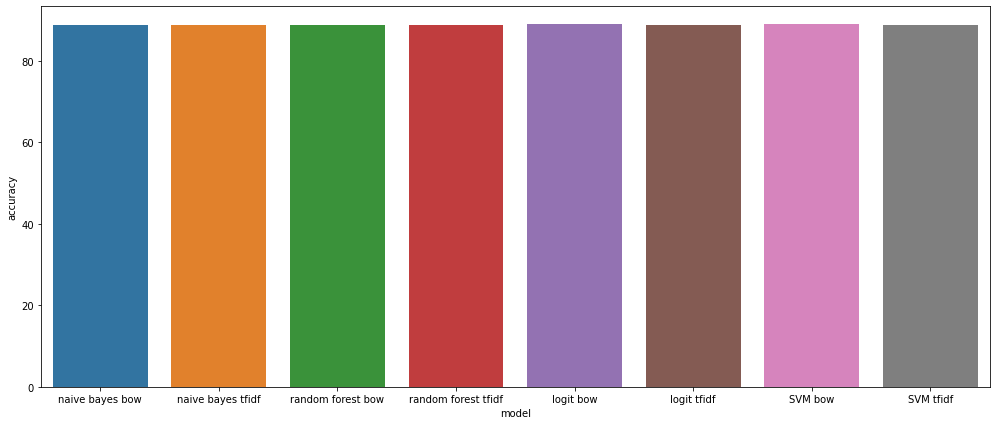

In [51]:
plt.figure(figsize = (17,7))
sns.barplot(y = df.accuracy, x = df.model)

and the same accuracy of 89%